### Apply the 'gettig started' Turorial to our dataset (aggregation by day)

In [1]:
import pandas as pd
from fbprophet import Prophet

In [3]:
df = pd.read_csv('../../data/cleaned/dateseries_04_18.csv')
df.head(), df.tail()

(           ds   y
 0  2004-01-01  26
 1  2004-01-02  78
 2  2004-01-03  21
 3  2004-01-04  17
 4  2004-01-05  26,               ds   y
 5474  2018-12-27  25
 5475  2018-12-28  31
 5476  2018-12-29  18
 5477  2018-12-30  18
 5478  2018-12-31  40)

In [4]:
m = Prophet(daily_seasonality=True)
m.add_country_holidays(country_name='US')
m.fit(df)
m.train_holiday_names

0                  New Year's Day
1     Martin Luther King, Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object

In [5]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
5839 2019-12-27
5840 2019-12-28
5841 2019-12-29
5842 2019-12-30
5843 2019-12-31

In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
5839 2019-12-27  34.226392   23.808178   44.968866
5840 2019-12-28  27.715763   17.857746   39.108833
5841 2019-12-29  20.445653    9.400423   31.216139
5842 2019-12-30  26.932873   16.228999   36.854868
5843 2019-12-31  28.792647   19.276492   39.696984

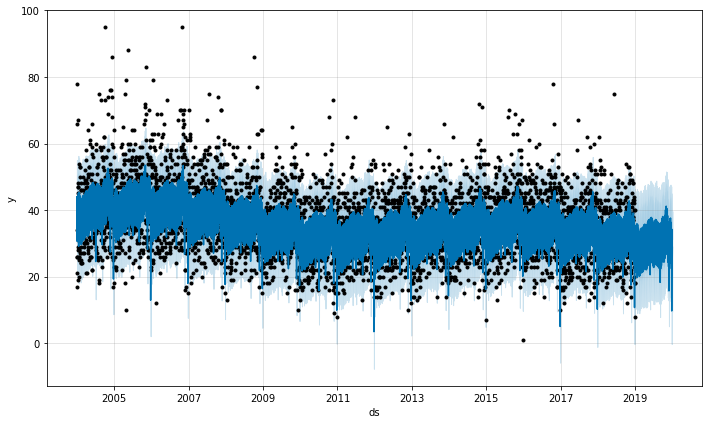

In [7]:
fig1 = m.plot(forecast)

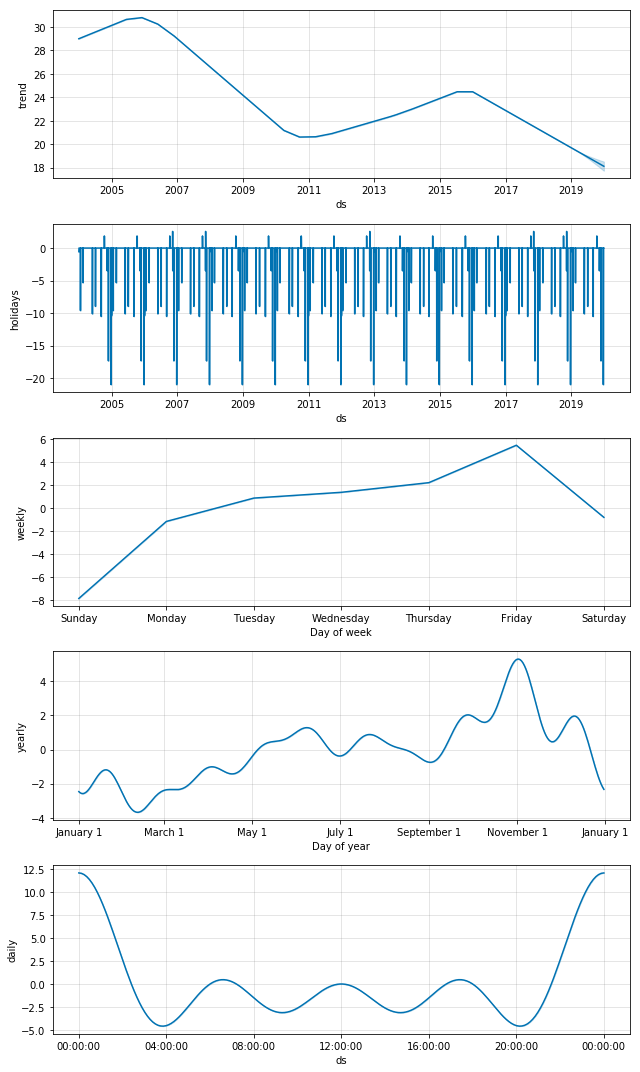

In [8]:
fig2 = m.plot_components(forecast)

In [9]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)